In [6]:
# core imports required for notebook execution

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
# initial dataload.  note that data separator is a semicolon
df = pd.read_csv('data.csv', sep = ';', header=0)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
#decided to shorten some headings, translate others to english, shift all to lowercase, etc.
cols = ['marital_status', 'app_mode', 'app_order', 'course', 'day_evening', 'prev_qual', 'prev_qual_grade', 'nationality', 'mother_qual',
        'father_qual', 'mother_occupation', 'father_occupation', 'admission_grade', 'displaced', 'special_needs', 'debtor', 'tuition_updated',
        'gender', 'scholarship', 'enrolled_age', 'international', 'sem1_units_credited', 'sem1_units_enrolled', 'sem1_unit_evals', 'sem1_unit_approved',
        'sem1_grades', 'sem1_units_noeval', 'sem2_units_credited', 'sem2_units_enrolled', 'sem2_unit_evals', 'sem2_unit_approved', 'sem2_grades',
        'sem2_units_noeval', 'unemployment', 'inflation', 'gdp', 'target']
df.columns = cols
df.head()

,marital_status,app_mode,app_order,course,day_evening,prev_qual,prev_qual_grade,nationality,mother_qual,father_qual,...,sem2_units_credited,sem2_units_enrolled,sem2_unit_evals,sem2_unit_approved,sem2_grades,sem2_units_noeval,unemployment,inflation,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
# examining distribution of target bins.  dropouts represent about a third of the data overall.  should be plenty of data here to support a model depending on shape of the data itself.
df.target.value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [10]:
# dataset currently has target encoded as a 3-way classification.  since we haven't addressed this yet via the class, adding a separate column
# to turn this into a binary classification problem (either dropped out or not).  Stretch goal will be to evaluate both binary and multi-state classifications...
target_trans = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 0}
df['dropout'] = df['target'].apply(lambda x: target_trans[x])
df.dropout.value_counts()

dropout
0    3003
1    1421
Name: count, dtype: int64

In [11]:
df.isnull().sum() #similar results verified for isna --> validates claim by data provider that data has no missing values

marital_status         0
app_mode               0
app_order              0
course                 0
day_evening            0
prev_qual              0
prev_qual_grade        0
nationality            0
mother_qual            0
father_qual            0
mother_occupation      0
father_occupation      0
admission_grade        0
displaced              0
special_needs          0
debtor                 0
tuition_updated        0
gender                 0
scholarship            0
enrolled_age           0
international          0
sem1_units_credited    0
sem1_units_enrolled    0
sem1_unit_evals        0
sem1_unit_approved     0
sem1_grades            0
sem1_units_noeval      0
sem2_units_credited    0
sem2_units_enrolled    0
sem2_unit_evals        0
sem2_unit_approved     0
sem2_grades            0
sem2_units_noeval      0
unemployment           0
inflation              0
gdp                    0
target                 0
dropout                0
dtype: int64

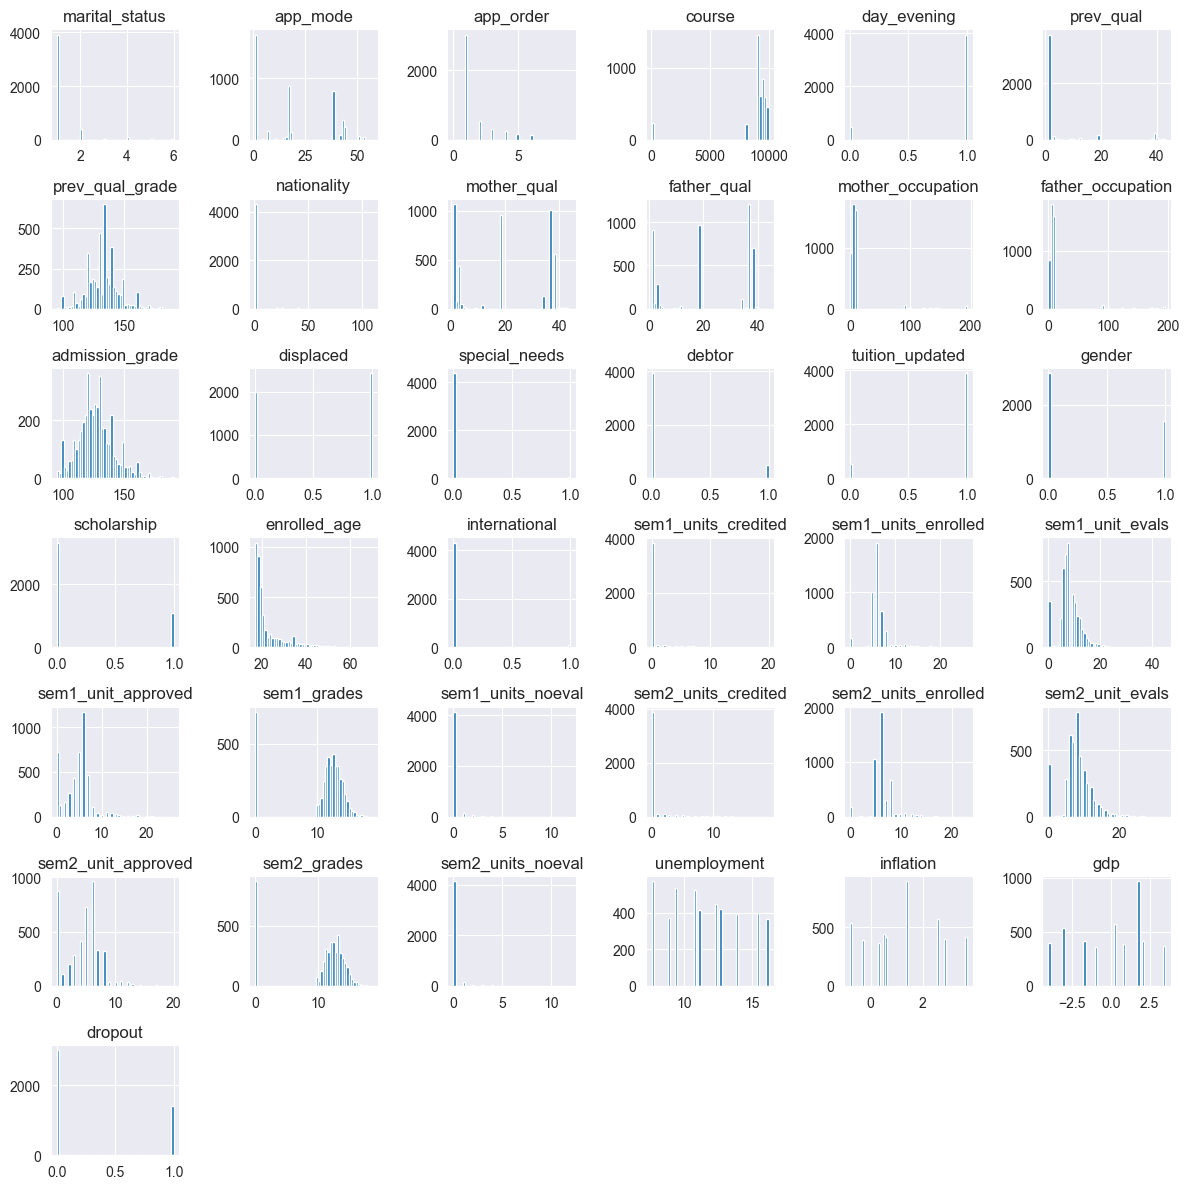

In [12]:
#nothing much too interesting based on general shape of individual data features.  some like marital status, nationality, etc. appear to be so dominated by single values that they'll likely be relatively insignificant to overall prediction outcomes/influence on model behavior

df.hist(figsize = (12,12), bins = 50)
plt.tight_layout()
plt.show()

In [13]:
# getting rid of the single non-numeric feature in the dataset by label encoding it
target_trans = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
df['target'] = df['target'].apply(lambda x: target_trans[x])  # make all columns numeric

<Axes: >

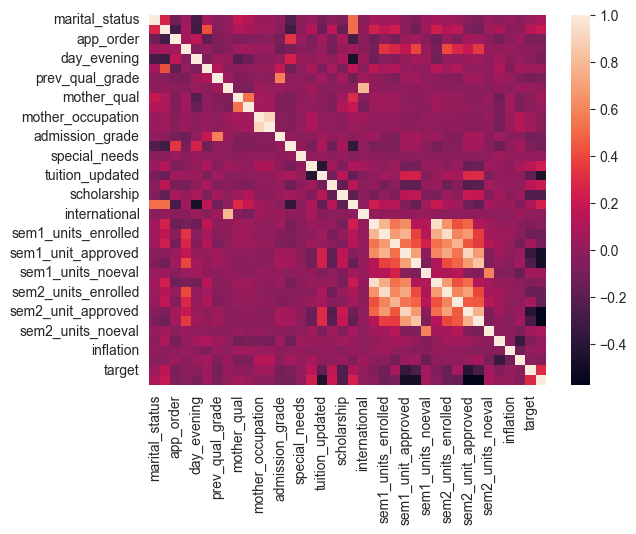

In [14]:
# you can start to see patterns emerging that tie academic elements together (indications of correlations between semester 1 and 2 data features), but no real "smoking gun" in terms of visual correlations with targets of interest.
sns.heatmap(df.corr())

In [15]:
# as expected - academic features figure prominently.  how well a student was doing in semesters 1-2 are towards the top of the list, as are how many class units they were approved for.  Whether or not they were up to date on tuition/fees is also towards the top of the list, with correlation of other features quickly dropping off after this.  As noted above, features like nationality, parents occupation, etc. seem relatively negligible, but will leave all features in at this time for model evaluation.

df.corrwith(df['dropout']).abs().sort_values(ascending = False)

dropout                1.000000
sem2_grades            0.571792
sem2_unit_approved     0.569500
sem1_grades            0.480669
sem1_unit_approved     0.479112
tuition_updated        0.429149
target                 0.289776
enrolled_age           0.254215
scholarship            0.245354
debtor                 0.229407
gender                 0.203983
app_mode               0.198458
sem2_unit_evals        0.154999
sem2_units_enrolled    0.141515
sem1_units_enrolled    0.124635
displaced              0.107232
admission_grade        0.095806
marital_status         0.093712
sem1_unit_evals        0.090125
day_evening            0.080499
sem2_units_noeval      0.079901
prev_qual_grade        0.078208
app_order              0.070485
mother_qual            0.064958
sem1_units_noeval      0.054230
prev_qual              0.049379
gdp                    0.046319
course                 0.033676
sem2_units_credited    0.033038
sem1_units_credited    0.029308
inflation              0.027826
father_o

In [16]:
from sklearn.metrics import mutual_info_score

def mi_score(series):
    return mutual_info_score(series, df.dropout)


In [17]:
# similar results for examination of mutual information scores across all features.

mi = df.apply(mi_score)
mi.sort_values(ascending = False)

C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

dropout                0.627773
target                 0.627773
sem2_grades            0.241292
sem2_unit_approved     0.219412
sem1_grades            0.203653
sem1_unit_approved     0.174382
admission_grade        0.106721
tuition_updated        0.087932
sem2_unit_evals        0.069126
sem1_unit_evals        0.057219
enrolled_age           0.052569
prev_qual_grade        0.047363
app_mode               0.044376
course                 0.034555
scholarship            0.034052
sem1_units_enrolled    0.030936
sem2_units_enrolled    0.026467
debtor                 0.024393
mother_occupation      0.023719
prev_qual              0.021745
gender                 0.020411
father_qual            0.020258
father_occupation      0.020167
mother_qual            0.020100
marital_status         0.006364
displaced              0.005737
app_order              0.004668
sem1_units_credited    0.004153
sem1_units_noeval      0.004004
unemployment           0.003790
gdp                    0.003790
sem2_uni

In [18]:
# data has been label encoded - in some cases this doesn't make sense and I wonder if it could introduce bias into the model (we'll examine this later)
# for now, need to reset to text values to support 1-hot encoding

marital_status = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto_union',
    6: 'separated'
}

app_mode = {
    1: '1stphase_general',
    2: 'ord61293',
    5: 'special_1st_azores',
    7: 'other_higher_courses',
    10: 'ord85499',
    15: 'int_student',
    16: 'special_1st_madeira',
    17: '2ndphase_general',
    18: '3rdphase_general',
    26: 'ord53399_b2',
    27: 'ord53399_b3',
    39: 'over_23',
    42: 'transfer',
    43: 'change_of_course',
    44: 'tech_specialization',
    51: 'change_inst',
    53: 'short_cycle',
    57: 'int_change_inst'
}

course = {
    33: 'biofuel_prod',
    171: 'animation',
    8014: 'social_service',  #removed evening/day discriminator since already flagged with day/night field
    9003: 'agronomy',
    9070: 'comm_design',
    9085: 'vet_nursing',
    9119: 'informatics',
    9130: 'equinculture',
    9147: 'management',    #removed evening/day discriminator since already flagged with day/night field
    9238: 'social_service',  #removed evening/day discriminator since already flagged with day/night field
    9254: 'tourism',
    9500: 'nursing',
    9556: 'oral_hygiene',
    9670: 'advertising',
    9773: 'journalism',
    9853: 'education',
    9991: 'management'  #removed evening/day discriminator since already flagged with day/night field
}

prev_qual = {
    1: 'secondary',
    2: 'bachelors',
    3: 'higher_ed_degree',
    4: 'masters',
    5: 'doctorate',
    6: 'freq_higher_ed',
    9: '12th_year_incomplete',
    10: '11th_year_incomplete',
    12: 'other_11th',
    14: '10th_year',
    15: '10th_year_incomplete',
    19: 'basic_3rd_cycle',
    38: 'basic_2nd_cycle',
    39: 'tech_specialization',
    40: 'higher_ed_1stcycle',
    42: 'prof_higher_ed',
    43: 'masters_2nd_cycle'
}

nationality = {
    1: 'portuguese',
    2: 'german',
    6: 'spanish',
    11: 'italian',
    13: 'dutch',
    14: 'english',
    17: 'lithuanian',
    21: 'angolan',
    22: 'cape_verdean',
    24: 'guinean',
    25: 'mozambican',
    26: 'santomean',
    32: 'turkish',
    41: 'brazilian',
    62: 'romanian',
    100: 'moldovan',
    101: 'mexican',
    103: 'ukrainian',
    105: 'russian',
    108: 'cuban',
    109: 'columbian'
}

mother_qual = {
    1: 'secondary',
    2: 'bachelors',
    3: 'higher_ed_degree',
    4: 'masters',
    5: 'doctorate',
    6: 'freq_higher_ed',
    9: '12th_year_incomplete',
    10: '11th_year_incomplete',
    11: '7th_year_old',
    12: 'other_11th',
    14: '10th_year',
    18: 'gen_commerce',
    19: 'basic_3rd_cycle',
    22: 'tech_professional',
    26: '7th_year_schooling',
    27: 'gen_hs_2nd_cycle',
    29: '9th_year_incomplete',
    30: '8th_year',
    34: 'unknown',
    35: 'illiterate',
    36: 'reads_wo_4th_year_school',
    37: 'basic_1st_cycle',
    38: 'basic_2nd_cycle',
    39: 'tech_specialization',
    40: 'higher_ed_1stcycle',
    41: 'specialized_higher',
    42: 'prof_higher_ed',
    43: 'masters_2nd_cycle',
    44: 'doctorate_3rd_cycle'
}

father_qual = {
    1: 'secondary',
    2: 'bachelors',
    3: 'higher_ed_degree',
    4: 'masters',
    5: 'doctorate',
    6: 'freq_higher_ed',
    9: '12th_year_incomplete',
    10: '11th_year_incomplete',
    11: '7th_year_old',
    12: 'other_11th',
    13: '2nd_year_hs',
    14: '10th_year',
    18: 'gen_commerce',
    19: 'basic_3rd_cycle',
    20: 'complementary_hs',
    22: 'tech_professional',
    25: 'complementary_hs_incomplete',
    26: '7th_year_schooling',
    27: 'gen_hs_2nd_cycle',
    29: '9th_year_incomplete',
    30: '8th_year',
    31: 'gen_admin_commerce',
    33: 'supplementary_accounting',
    34: 'unknown',
    35: 'illiterate',
    36: 'reads_wo_4th_year_school',
    37: 'basic_1st_cycle',
    38: 'basic_2nd_cycle',
    39: 'tech_specialization',
    40: 'higher_ed_1stcycle',
    41: 'specialized_higher',
    42: 'prof_higher_ed',
    43: 'masters_2nd_cycle',
    44: 'doctorate_3rd_cycle'
}

mother_occupation = {    #multiple opportunities to consolidate - see below
    0: 'student',
    1: 'legislative_rep',
    2: 'scientific',          #combine with 131
    3: 'intermediate_tech',
    4: 'admin_staff',         #potentially combine with 141, 143, 144
    5: 'personal_services',   #combine with 151, 152
    6: 'agriculture',         #combine with 192
    7: 'skilled_trades',      #combine with 171
    8: 'manufacturing',       #combine with 173
    9: 'unskilled_labor',     #combine with 193
    10: 'armed_forces',
    90: 'other',
    99: 'blank',
    122: 'healthcare',        #combine with 132
    123: 'teacher',
    125: 'info_tech',
    131: 'intermediate_science',
    132: 'intermediate_healthcare',
    134: 'intermediate_cultural',
    141: 'office_worker',
    143: 'data_accounting',
    144: 'other_admin_support',
    151: 'personal_service_worker',
    152: 'sellers',
    153: 'personal_care',
    171: 'skilled_construction',
    173: 'skilled_manufacturing',
    175: 'food_wood_textiles',      #combine with 194
    191: 'cleaning',
    192: 'unskilled_agriculture',
    193: 'unskilled_extractive',
    194: 'meal_prep'
}

father_occupation = {    #multiple opportunities to consolidate - see below
    0: 'student',
    1: 'legislative_rep',
    2: 'scientific',          #combine with 131, maybe 121
    3: 'intermediate_tech',
    4: 'admin_staff',         #potentially combine with 141, 143, 144
    5: 'personal_services',   #combine with 151, 152, 154
    6: 'agriculture',         #combine with 192
    7: 'skilled_trades',      #combine with 171
    8: 'manufacturing',       #combine with 173
    9: 'unskilled_labor',     #combine with 193
    10: 'armed_forces',       #can potentially combine all armed forces (101, 102, 103)
    90: 'other',
    99: 'blank',
    101: 'armed_forces_officer',
    102: 'armed_forces_sergeant',
    103: 'other_armed_forces',
    112: 'admin_commercial_director',
    114: 'hotel_services_director',
    121: 'phys_science_math_specialist',
    122: 'healthcare',        #combine with 132
    123: 'teacher',
    124: 'finance_accounting_specialist',
    131: 'intermediate_science',
    132: 'intermediate_healthcare',
    134: 'intermediate_cultural',
    135: 'info_comm_technology_technician',
    141: 'office_worker',
    143: 'data_accounting',
    144: 'other_admin_support',
    151: 'personal_service_worker',
    152: 'sellers',
    153: 'personal_care',
    154: 'security_services',
    161: 'skilled_agriculture_worker',
    163: 'subsistence_farmer',
    171: 'skilled_construction',
    172: 'skilled_metallurgy_etc',
    173: 'skilled_manufacturing',
    174: 'skilled_electrical',
    175: 'food_wood_textiles',      #combine with 194
    181: 'plant_machine_operator',
    182: 'assembly_worker',
    183: 'vehicle_driver',
    192: 'unskilled_agriculture',
    193: 'unskilled_extractive',
    194: 'meal_prep',
    195: 'street_vendor'
}

#keep independent versions to compare different approaches to model encoding
dfcoded = df.copy()
dfcoded.marital_status = dfcoded.marital_status.map(marital_status)
dfcoded.app_mode = dfcoded.app_mode.map(app_mode)
dfcoded.course = dfcoded.course.map(course)
dfcoded.prev_qual = dfcoded.prev_qual.map(prev_qual)
dfcoded.nationality = dfcoded.nationality.map(nationality)
dfcoded.mother_qual = dfcoded.mother_qual.map(mother_qual)
dfcoded.father_qual = dfcoded.father_qual.map(father_qual)
dfcoded.mother_occupation = dfcoded.mother_occupation.map(mother_occupation)
dfcoded.father_occupation = dfcoded.father_occupation.map(father_occupation)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# two separate versions to examine.  one label encoded, one slated for 1-hot-encoding
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.dropout.values
y_test = df_test.dropout.values
y_val = df_val.dropout.values

df_train.drop(['dropout', 'target'], axis=1, inplace=True)
df_test.drop(['dropout', 'target'], axis=1, inplace=True)
df_val.drop(['dropout', 'target'], axis=1, inplace=True)

dfcoded_full_train, dfcoded_test = train_test_split(dfcoded, test_size = 0.2, random_state = 11)
dfcoded_train, dfcoded_val = train_test_split(dfcoded_full_train, test_size = 0.25, random_state = 11)
dfcoded_train = dfcoded_train.reset_index(drop=True)
dfcoded_val = dfcoded_val.reset_index(drop=True)
dfcoded_test = dfcoded_test.reset_index(drop=True)

ycoded_train = dfcoded_train.dropout.values
ycoded_test = dfcoded_test.dropout.values
ycoded_val = dfcoded_val.dropout.values

dfcoded_train.drop(['dropout', 'target'], axis=1, inplace=True)
dfcoded_test.drop(['dropout', 'target'], axis=1, inplace=True)
dfcoded_val.drop(['dropout', 'target'], axis=1, inplace=True)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [22]:
model = LogisticRegression(max_iter=10000)          #model for label-encoded data
coded_model = LogisticRegression(max_iter=10000)    #model for one-hot-encoded data

base_dv = DictVectorizer(sparse=False)   #dv for label-encoded data
coded_dv = DictVectorizer(sparse=False)  #dv for one-hot-encoded data

base_dict = df_train.to_dict(orient = 'records')
val_dict = df_val.to_dict(orient = 'records')

coded_dict = dfcoded_train.to_dict(orient = 'records')
val_coded_dict = dfcoded_val.to_dict(orient = 'records')

X_train = base_dv.fit_transform(base_dict)
X_val = base_dv.transform(val_dict)

Xcoded_train = coded_dv.fit_transform(coded_dict)
Xcoded_val = coded_dv.transform(val_coded_dict)




# Linear Regression Model

In [23]:
# initial training and fitting for base (label encoded) model and a separate fully one-hot-encoded model.  Initial results indicate they're on par
model.fit(X_train, y_train)
coded_model.fit(Xcoded_train, y_train)

y_pred = model.predict_proba(X_val)[:,1]
drop = (y_pred > 0.5)
print('Base model mean alignment = %.3f' % ((y_val == drop).mean()))

ycoded_pred = coded_model.predict_proba(Xcoded_val)[:,1]
coded_drop = (ycoded_pred > 0.5)
print('Coded model mean alignment = %.3f' % ((ycoded_val == coded_drop).mean()))

C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Base model mean alignment = 0.871
Coded model mean alignment = 0.875


In [28]:
# based on error messages received, attempting to scale the data.  as will be seen, model actually runs quicker, and results are comparable (although the one-hot-encoded model's performance actually worsens)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

scale_model = LogisticRegression()
scale_model.fit(X_train_scaled, y_train)
y_pred_scale = scale_model.predict_proba(X_val_scaled)[:,1]
drop = (y_pred_scale > 0.5)
print('Scaled model mean alignment = %.3f' % ((y_val == drop).mean()))

Xcode_train_scale = scaler2.fit_transform(Xcoded_train)
Xcode_val_scale = scaler2.transform(Xcoded_val)
coded_scale_model = LogisticRegression()
coded_scale_model.fit(Xcode_train_scale, ycoded_train)
ycoded_pred_scale = coded_scale_model.predict_proba(Xcode_val_scale)[:,1]
coded_drop_scale = (ycoded_pred_scale > 0.5)
print('Scaled coded model mean alignment = %.3f' % ((y_val == coded_drop_scale).mean()))

Scaled model mean alignment = 0.871
Scaled coded model mean alignment = 0.869


In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_scale)

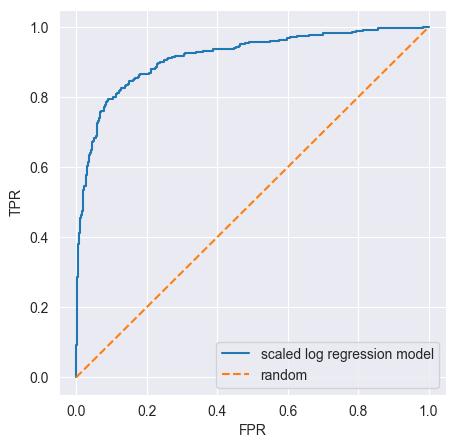

In [27]:
plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, label = 'scaled log regression model')
plt.plot([0,1], [0,1], label = 'random', linestyle = '--')  #actual line is a little messier, but will approximate this the more data there is

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# model performance isn't too bad!

In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
# sticking with the base, label-encoded model, and examining implications of modifying regularization values

base_dv = DictVectorizer(sparse=False)   #dv for label-encoded data
base_dict = df_train.to_dict(orient = 'records')
val_dict = df_val.to_dict(orient = 'records')

X_train = scaler.fit_transform(base_dv.fit_transform(base_dict))
X_val = scaler.transform(base_dv.transform(val_dict))

scores = []
for c in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    model = LogisticRegression(C = c)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    scores.append(roc_auc_score(y_val, y_pred))
    print ('C = %.3f --> %.3f +/- %.3f' % (c, np.mean(scores), np.std(scores)))



C = 0.001 --> 0.895 +/- 0.000
C = 0.010 --> 0.902 +/- 0.007
C = 0.100 --> 0.906 +/- 0.008
C = 0.500 --> 0.909 +/- 0.008
C = 1.000 --> 0.910 +/- 0.008
C = 5.000 --> 0.911 +/- 0.007
C = 10.000 --> 0.912 +/- 0.007


In [42]:
#final linear regression model
train_dict = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(train_dict)



In [43]:
model = LogisticRegression(C = 10, max_iter = 20000)
model.fit(X, y_full_train)
test_dict = df_test.to_dict(orient = 'records')

pred = model.predict_proba(dv.transform(test_dict))[:,1]
print('Standard = %.3f' % (roc_auc_score(y_test,pred)))

full_scale = scaler.fit_transform(X)
test_scale = scaler.transform(dv.transform(test_dict))
model.fit(full_scale, y_full_train)
pred = model.predict_proba(test_scale)[:,1]
print('Scaled = %.3f' % (roc_auc_score(y_test, pred)))

Standard = 0.911
Scaled = 0.911


C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12515 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Cross-validation (KFold)

In [44]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)

    return dv, X_train, model

In [45]:
def predict(df, dv, model):
    dicts = df.to_dict(orient = 'records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred

C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/st

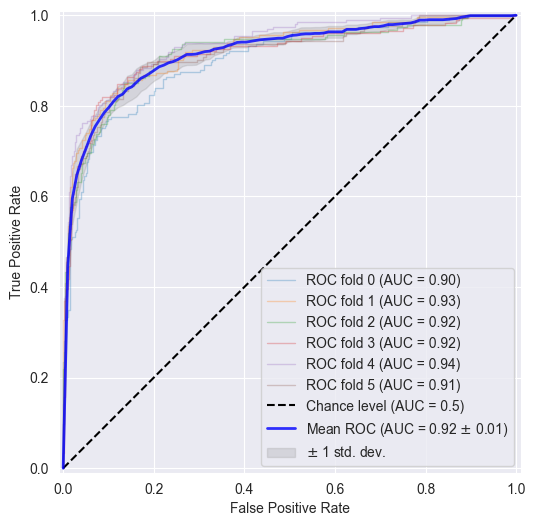

In [32]:
#excellent visualization to see model performance across each individual fold as validation proceeds.  code adapted from sample at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import KFold, cross_validate

dv, X_full, model = train(df_full_train, y_full_train, C=10)

n_splits = 6
cv = KFold(n_splits=n_splits, shuffle=True)
cv_results = cross_validate(
    model, X_full, y_full_train, cv=cv, return_estimator=True, return_indices=True
)

prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
curve_kwargs_list = [
    dict(alpha=0.3, lw=1, color=colors[fold % len(colors)]) for fold in range(n_splits)
]
names = [f"ROC fold {idx}" for idx in range(n_splits)]

mean_fpr = np.linspace(0, 1, 100)
interp_tprs = []

_, ax = plt.subplots(figsize=(6, 6))
viz = RocCurveDisplay.from_cv_results(
    cv_results,
    X_full,
    y_full_train,
    ax=ax,
    name=names,
    curve_kwargs=curve_kwargs_list,
    plot_chance_level=True,
)

for idx in range(n_splits):
    interp_tpr = np.interp(mean_fpr, viz.fpr[idx], viz.tpr[idx])
    interp_tpr[0] = 0.0
    interp_tprs.append(interp_tpr)

mean_tpr = np.mean(interp_tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(viz.roc_auc)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(interp_tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend(loc="lower right")
plt.show()

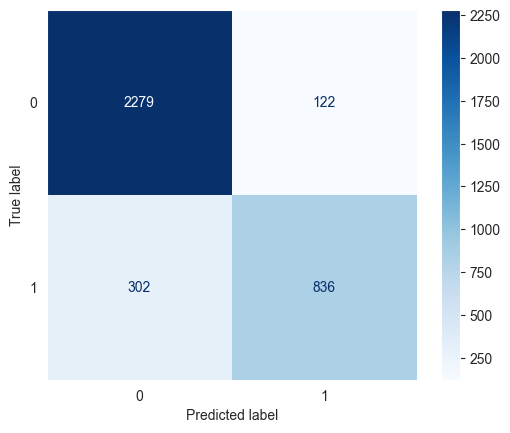

In [33]:
#also interested in seeing alternative visualizations of model performance
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model, X_full, y_full_train, cmap = 'Blues', ax = None)
#disp.ax_.grid(False)
plt.grid(False)
plt.show()


C:\Users\akjnm\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


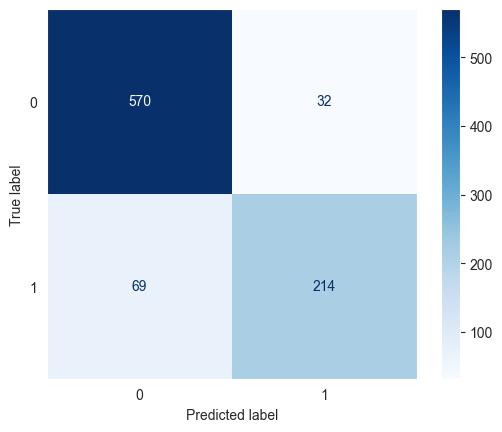

In [46]:
dv, X_full, model = train(df_full_train, y_full_train, C=10)
y_pred = predict(df_test, dv, model)
disp = ConfusionMatrixDisplay.from_predictions(y_test,(y_pred >= 0.5).astype(int), cmap = 'Blues', ax = None)
plt.grid(False)
plt.show()

# Decision Tree

In [47]:
#Now to try Decision Tree - shifting to straight classifier
from sklearn.tree import DecisionTreeClassifier
train_dict = df_train.to_dict(orient = 'records')
val_dict = df_val.to_dict(orient = 'records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]
print('Initial Decision Tree score = %.3f' % (roc_auc_score(y_val, y_pred)))

Initial Decision Tree score = 0.794


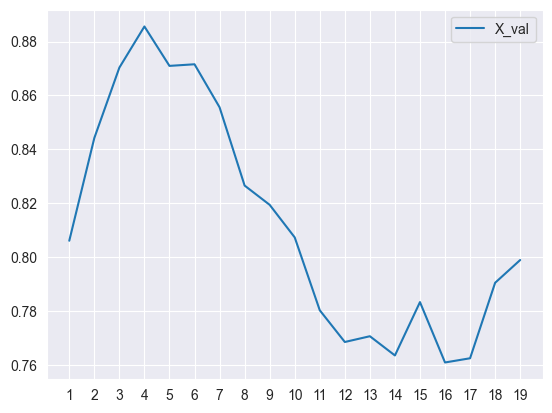

In [49]:
# initial tuning - max_depth
val_score = []
train_score = []
for c in list(np.arange(1,20)):
    dt = DecisionTreeClassifier(max_depth = c)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    val_score.append(roc_auc_score(y_val, y_pred))
    y_pred = dt.predict_proba(X_train)[:,1]
    train_score.append(roc_auc_score(y_train, y_pred))

plt.plot(np.arange(1,20), val_score, label = 'X_val')
plt.xticks(np.arange(1,20))
plt.legend()

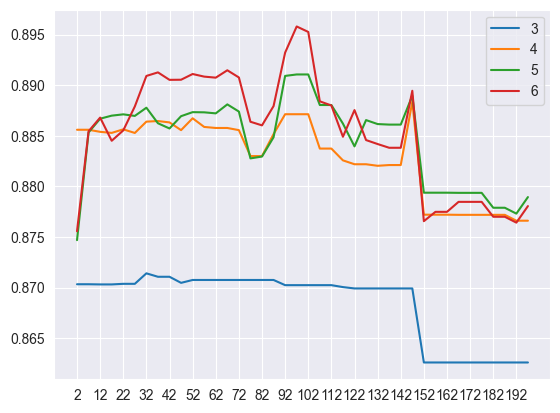

In [187]:
#appears depths of 3 - 6 would be best.  Now looking at min_samples_leaf

val_score = []
scores = []
for d in [3, 4, 5, 6]:
    for c in list(np.arange(2,200,5)):
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf=c)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        val_score.append(roc_auc_score(y_val, y_pred))
        scores.append((d, c, roc_auc_score(y_val, y_pred)))
    plt.plot(np.arange(2,200,5),val_score, label = d)
    plt.xticks(np.arange(2,200,10))
    plt.legend()
    val_score = []


In [188]:
df_scores = pd.DataFrame(scores, columns = ['depth', 'min_leaf', 'auc'])
df_scores.head()

,depth,min_leaf,auc
0,3,2,0.870328
1,3,7,0.870328
2,3,12,0.870310
3,3,17,0.870310
4,3,22,0.870369


In [189]:
df_scores_pivot = df_scores.pivot(index='min_leaf', columns=['depth'], values=['auc'])
df_scores_pivot.head().round(3)

auc                     
depth        3      4      5      6
min_leaf                           
2         0.87  0.886  0.875  0.876
7         0.87  0.886  0.885  0.885
12        0.87  0.885  0.887  0.887
17        0.87  0.885  0.887  0.885
22        0.87  0.886  0.887  0.886

<Axes: xlabel='None-depth', ylabel='min_leaf'>

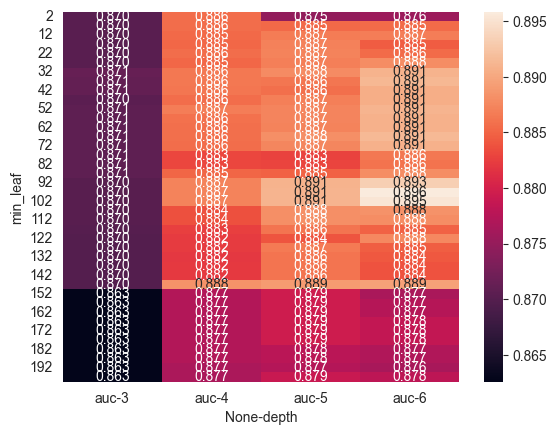

In [190]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [191]:
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 95)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,95
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


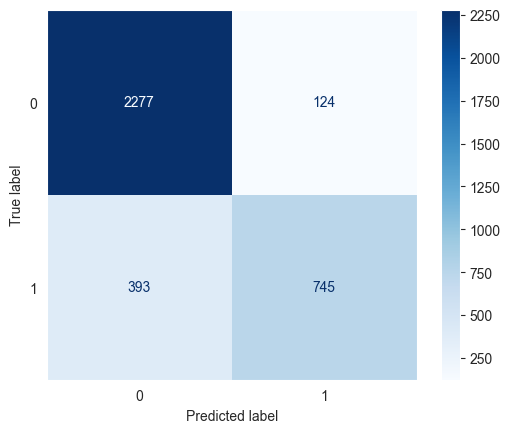

In [286]:
disp = ConfusionMatrixDisplay.from_estimator(dt, X_full, y_full_train, cmap = 'Blues', ax = None)
#disp.ax_.grid(False)
plt.grid(False)
plt.show()

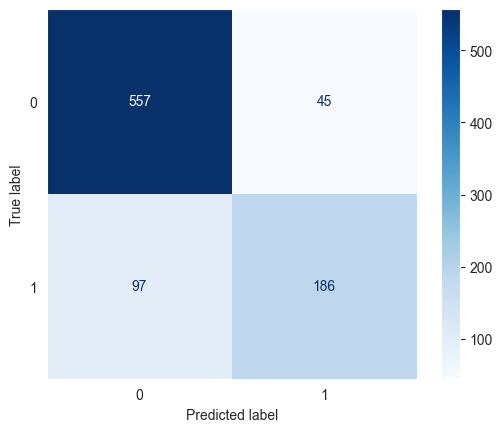

In [290]:

y_pred = dt.predict_proba(X_test)[:,1]
disp = ConfusionMatrixDisplay.from_predictions(y_test,(y_pred >= 0.5).astype(int), cmap = 'Blues', ax = None)
#disp.ax_.grid(False)
plt.grid(False)
plt.show()

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val,y_pred)

0.9079644254880364

In [53]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators = n, random_state = 1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

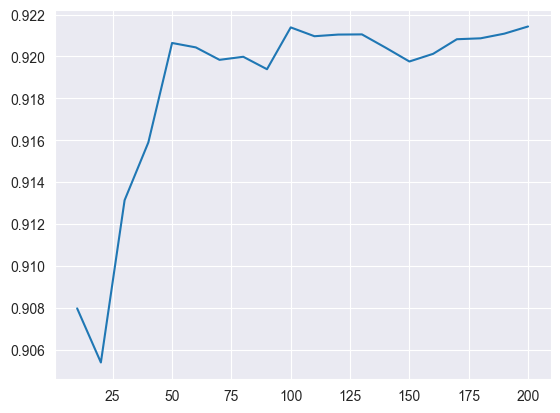

In [54]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc, label = 'RandomForest')

In [55]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators = n, max_depth = d, random_state = 1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

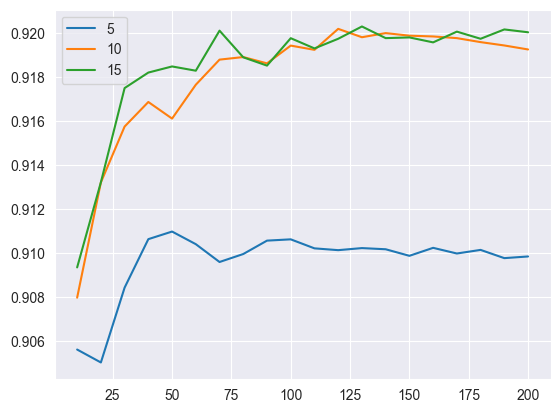

In [56]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'n_estimators', 'auc'])
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = d)

plt.legend()

In [57]:
# now for min_leaf...
scores = []

for s in [5, 15, 25, 50, 75, 80]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators = n, max_depth = 15, min_samples_leaf=s, random_state = 1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

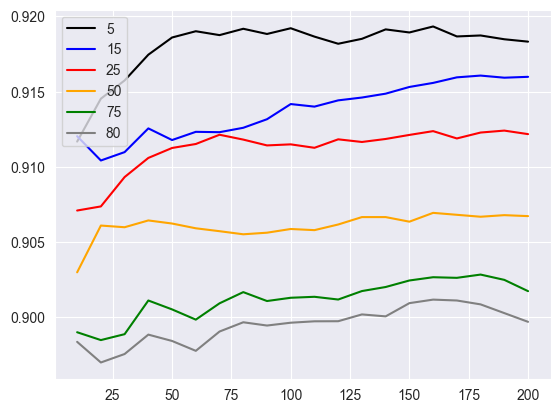

In [58]:
df_scores = pd.DataFrame(scores, columns = ['min_samples_leaf', 'n_estimators', 'auc'])
colors = ['black', 'blue', 'red', 'orange', 'green', 'grey']
min_samples_leaf_vals = [5, 15, 25, 50, 75, 80]

for s, col in zip(min_samples_leaf_vals, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = s, color = col)

plt.legend()

In [59]:
#final RandomForest model
rf = RandomForestClassifier(n_estimators = 125, max_depth = 15, min_samples_leaf = 5, random_state = 1)
rf.fit(X_train, y_train)

,n_estimators,125
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
list(zip(dv.get_feature_names_out(), rf.feature_importances_))
importance_df = pd.DataFrame(list(zip(dv.get_feature_names_out(), rf.feature_importances_)), columns=['feature_names', 'feature_importances'])
importance_df = importance_df.sort_values(by='feature_importances', ascending=False)

C:\Users\akjnm\AppData\Local\Temp\ipykernel_6464\1756863126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature_importances', y='feature_names', data=importance_df, palette='Blues_r')


Text(0.5, 1.0, 'Feature Importance Chart')

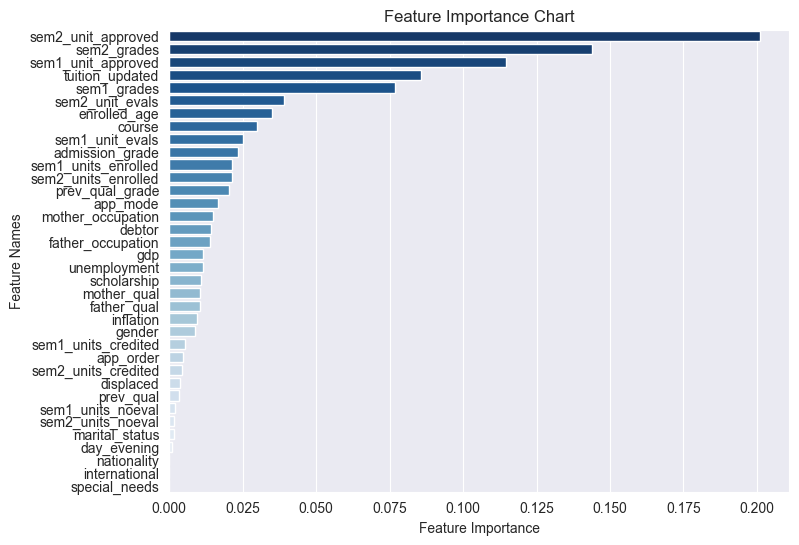

In [61]:
# examining feature importance as determined via model fitting.  Comparable to earlier assessments of correlation

plt.figure(figsize=(8, 6))
sns.barplot(x='feature_importances', y='feature_names', data=importance_df, palette='Blues_r')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Chart')

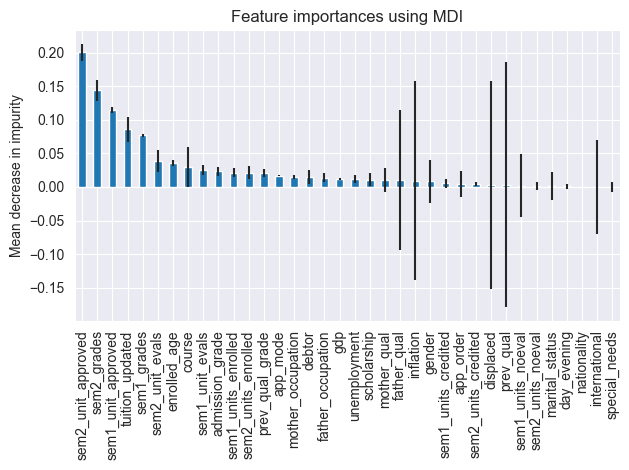

In [62]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index = list(dv.get_feature_names_out())).sort_values(ascending = False)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [63]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_train, y_train, n_repeats = 10, random_state = 11, n_jobs = -1, scoring = 'f1')
forest_importances = pd.Series(result.importances_mean, index = list(dv.get_feature_names_out())).sort_values(ascending = False)

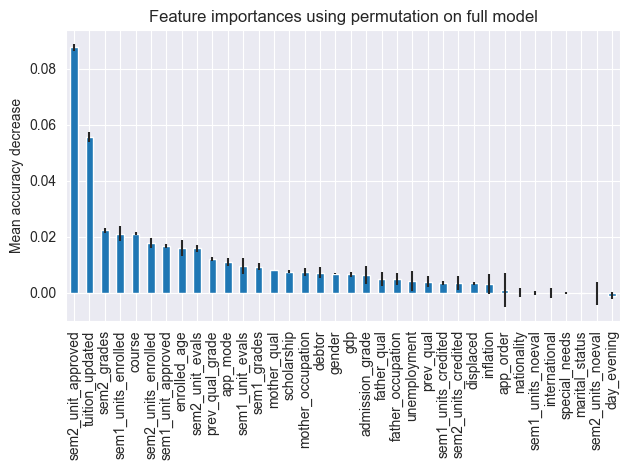

<Figure size 3000x2500 with 0 Axes>

In [64]:
fig, ax = plt.subplots()
plt.figure(figsize=(30,25))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## XGBoost

In [65]:
import xgboost as xgb

In [66]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [67]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params,dtrain, num_boost_round = 10)

In [68]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9082573644864194

In [69]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [70]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
watch = {}
model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 0, evals_result = watch, num_boost_round = 200)

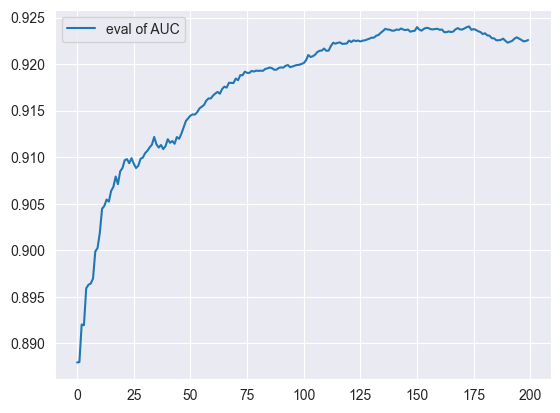

In [72]:
plt.plot(watch['eval']['auc'], label = 'eval of AUC')
plt.legend()

In [73]:
scores = {}

In [74]:
def parse_xgb_output(output):
    cols = ['train_auc','eval_auc']
    df_results = pd.DataFrame(np.array([output['train']['auc'],output['eval']['auc']])).transpose()
    df_results.columns = cols
    return df_results

In [75]:
# 1st, explore different settings for eta

scores = {}

for e in [0.05, 0.01, 0.1, 0.3, 1.0]:
    xgb_params = {
        'eta': e,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
    key = 'eta=%s' % (xgb_params['eta'])
    watch = {}
    model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 0, evals_result = watch, num_boost_round = 200)
    scores[key] = parse_xgb_output(watch)

scores.keys()

dict_keys(['eta=0.05', 'eta=0.01', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

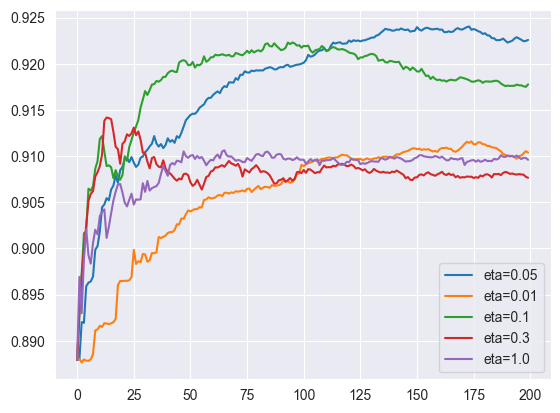

In [76]:
for key, df_scores in scores.items():
    plt.plot(df_scores.eval_auc, label = key)
plt.legend()

In [77]:
# sticking with eta = 0.05 (0.1 is a second) until they cross at ~110 iterations.  moving to max_depth
scores = {}
for d in [3, 4, 6, 10]:
    xgb_params = {
        'eta': 0.05,
        'max_depth': d,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
    watch = {}
    model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 0, evals_result = watch, num_boost_round = 200)
    key = 'max_depth=%s' % (xgb_params['max_depth'])
    scores[key] = parse_xgb_output(watch)
    scores.keys()

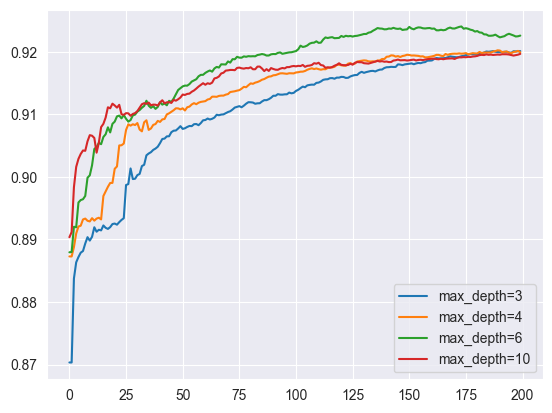

In [78]:
for key, df_scores in scores.items():
    plt.plot(df_scores.eval_auc, label = key)
plt.legend()

In [79]:
# default value for max_depth (6) is best.  moving to min_child_weight
scores = {}
for d in [1, 10, 30]:
    xgb_params = {
        'eta': 0.05,
        'max_depth': 6,
        'min_child_weight': d,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
    watch = {}
    model = xgb.train(xgb_params,dtrain, evals = watchlist, verbose_eval = 0, evals_result = watch, num_boost_round = 200)
    key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
    scores[key] = parse_xgb_output(watch)

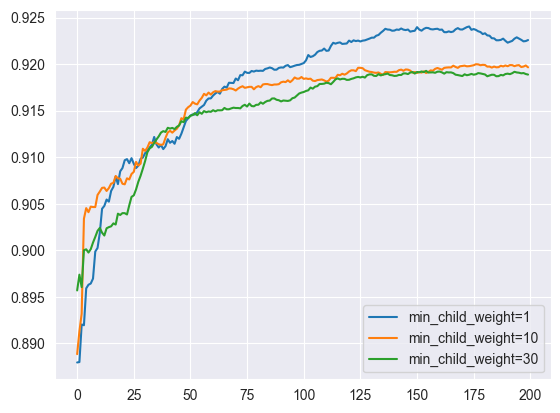

In [80]:
for key, df_scores in scores.items():
    plt.plot(df_scores.eval_auc, label = key)
plt.legend()

In [81]:
# default of min_child_weight = 1 appears best, with model consisently plateauing ~ 150 iterations.  Finalize with these settings, train on full set.

xgb_params = {
        'eta': 0.05,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 4,
        'seed': 1,
        'verbosity': 1,
    }
watch = {}
d_fulltrain = xgb.DMatrix(X, label = y_full_train, feature_names = features)
dicts_test = df_test.to_dict(orient = 'records')
X_test = dv.transform(dicts_test)
d_test = xgb.DMatrix(X_test, feature_names = list(dv.get_feature_names_out()))

xgb_final_model = xgb.train(xgb_params,d_fulltrain, num_boost_round = 150)
y_pred = xgb_final_model.predict(d_test)
roc_auc_score(y_test, y_pred)

0.9156815327001866

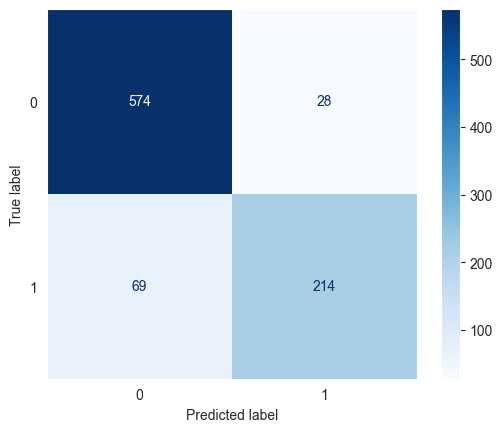

In [82]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, (y_pred >= 0.5).astype(int), cmap = 'Blues', ax = None)
#disp.ax_.grid(False)
plt.grid(False)
plt.show()